In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import Dataset
from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter
from PIL import Image
import spacy

In [30]:
nlp = spacy.load('en_core_web_sm')

In [31]:
videos = Dataset.load_from_disk('../data/videos')
labels = np.load('../data/cluster_labels.npy')

In [32]:
df = pd.DataFrame(videos)
df['label'] = labels

In [33]:
def get_doc(label):
    group_0 = df.loc[df['label'] == label]
    corpus = ''
    for index, row in group_0.iterrows():
        corpus = corpus + row['text']
    return nlp(text=corpus)

In [34]:
def lemmatize_corpus(doc):
    lemmatized_corpus = []
    freq = {}
    words = set(nlp.vocab.strings)
    for token in doc:
        if token.text in words and not token.is_stop and not token.is_punct and not token.is_digit and not token.text == '|':
            lemmatized_corpus.append(token)
            if token.text not in freq:
                freq[token.text] = 1
            else:
                freq[token.text] = freq[token.text] + 1
    return lemmatized_corpus, freq

In [44]:
# get 20 most common words for each cluster
common_word_list = pd.DataFrame()
for i in range(0,11):
    doc = get_doc(i)
    lemmas, freq = lemmatize_corpus(doc)
    common_word_list[i] = sorted(freq, key=freq.get, reverse=True)[0:20]
common_word_list

,0,1,2,3,4,5,6,7,8,9,10
0,,,,,,,China,,,,
1,News,Trump,subscribe,President,people,News,,China,News,News,News
2,Ukraine,President,Facebook,China,Sudan,,Chinese,Ukraine,Biden,Trump,Ukraine
3,Russia,Donald,News,Ukraine,News,Biden,President,Russian,,discuss,Trump
4,China,News,,News,killed,Trump,Xi,Russia,Trump,Biden,President
5,people,Biden,whistleblower,Russia,country,host,Beijing,News,discuss,,Russia
6,Sudan,House,social,Chinese,Ukraine,President,said,Chinese,President,news,China
7,Russian,charges,media,Xi,fighting,Watters,Foreign,said,R,latest,people
8,President,documents,Facebook:,Sudan,capital,Jesse,Minister,President,co,President,war
9,Newsfeed,New,Welcome,Minister,Russia,Hannity,Jinping,Sudan,Rep.,Ukraine,world


In [47]:
common_word_list.to_csv('../data/common_word_list.csv')

In [41]:
lemmatized_sentence = " ".join([token.lemma_ for token in lemmatize_corpus(get_doc(0))[0]])

In [42]:
wc = WordCloud(width=1600, height=800).generate_from_text(lemmatized_sentence)

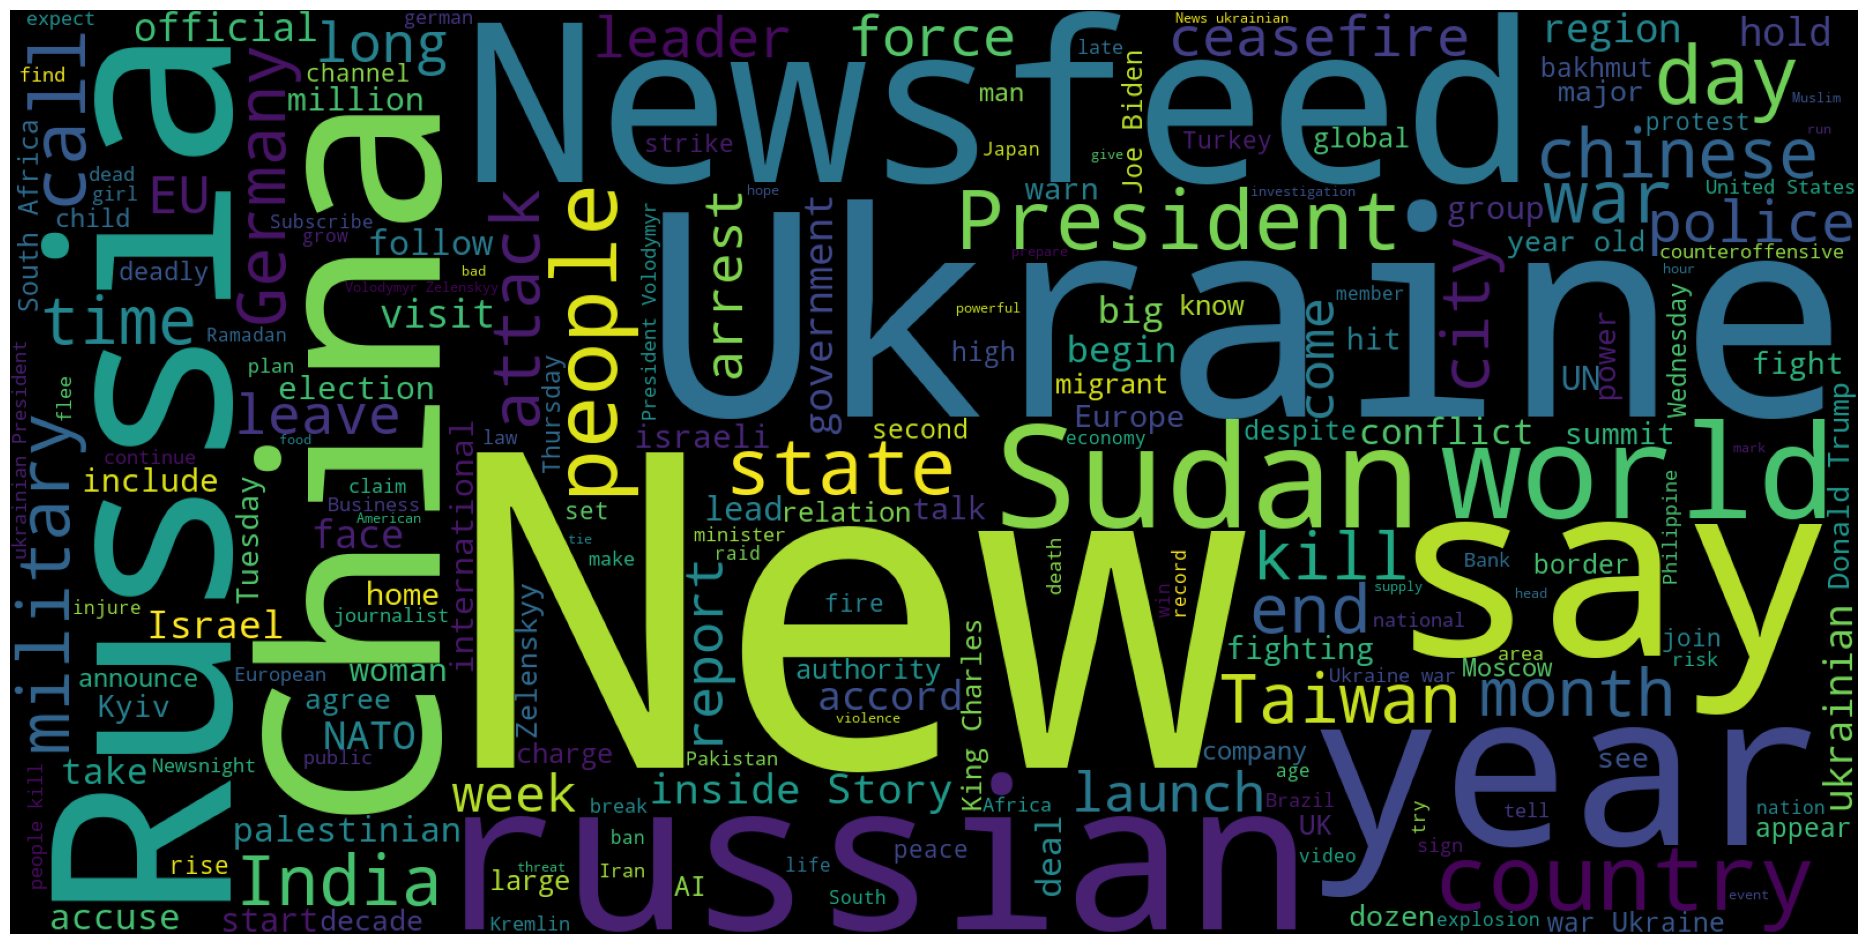

In [43]:
fig, ax = plt.subplots(figsize=(24,12))
plt.imshow(wc)
plt.axis('off')
plt.show()